In [1]:
import time 
import numpy as np
import math
from scipy.special import comb

In [2]:
def load_data(file):
    Xlist, Ylist = [], []
    fr = open(file)
    for line in fr.readlines():
        cur = line.strip().split(',')
        label = cur[-1]
        X = [float(x) for x in cur[:-1]]
        Xlist.append(X)
        Ylist.append(label)
    Xarray = np.array(Xlist)
    print('Data shape: ', Xarray.shape)
    print('Length of labels: ', len(Ylist))
    return Xarray, Ylist
f1 = 'iris.data'
Xarray, Ylist = load_data(f1)  # Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})
from collections import Counter 
Counter(Ylist)

Data shape:  (150, 4)
Length of labels:  150


Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})

In [3]:
def Normalize(Xarray):
    for f in range(Xarray.shape[1]):
        maxf = np.max(Xarray[:, f])
        minf = np.min(Xarray[:, f])
        for n in range(Xarray.shape[0]):
            Xarray[n][f] = (Xarray[n][f]-minf)/(maxf-minf)
    return Xarray
Xarray = Normalize(Xarray)

In [4]:
def cal_distance(xi, xj):
    dist = 0
    for col in range(len(xi)):
        dist += (xi[col]-xj[col])**2
    dist = math.sqrt(dist)
    return dist 

def Distances(Xarray):
    '''
    INPUT:
    Xarray - (array) 特征数据数组
    
    OUTPUT:
    dists - (array) 两两数据的欧式距离数组
    
    '''
    dists = np.zeros((Xarray.shape[0], Xarray.shape[0]))
    for n1 in range(Xarray.shape[0]):
        for n2 in range(n1):
            dists[n1][n2] = cal_distance(Xarray[n1], Xarray[n2])
            dists[n2][n1] = dists[n1][n2]
        dists[n1][n1] = 0
    return dists

dists = Distances(Xarray)
print(dists)


[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


In [5]:
from sklearn import metrics
def Adjusted_Rand_Index(group_dict, Ylist, k):
    '''
    INPUT:
    group_dict - (dict) 类别字典
    Ylist - (list) 类别标签列表
    k - (int) 设定的类别数
    
    OUTPUT:
    (int) 调整兰德系数
    
    '''
    prediction_list = [0] * len(Ylist)
    i = 0
    for a in group_dict.keys():
        for g in group_dict[a]:
            prediction_list[g] = i
        i += 1
    y_list = [0] * len(Ylist)
    for i in range(len(Ylist)): # Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})
        if Ylist[i] == Ylist[52]:
            y_list[i] = k-1
        elif Ylist[i] == Ylist[-1]:
            y_list[i] = k-2
    print(prediction_list)
    print(y_list)
    result = metrics.adjusted_rand_score(y_list, prediction_list)
#     >>> adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 1])
# 1.0
# >>> adjusted_rand_score([0, 0, 1, 1], [1, 1, 0, 0])
# 1.0
    return result

In [13]:
import random
def cal_groupcenter(group, Xarray):
    '''
    INPUT:
    group - (list) 类所包含的数据列表
    Xarray - (array) 特征数据数组
    
    OUTPUT:
    center - (array) 新的类中心
    
    '''
    center = np.zeros(Xarray.shape[1])
    for i in range(Xarray.shape[1]):
        for n in group:
            center[i] += Xarray[n][i]
    center /= len(group)
    return center

def kmeans(Xarray, k, iters):
    '''
    INPUT:
    Xarray - (array) 特征数据数组
    k - (int) 设定的类别数
    iters - (int) 设定的迭代次数
    
    OUTPUT:
    group_dict - (dict) 类别字典
    scores - (int) 每次迭代的ARI得分列表
    
    '''
    center_inds = random.sample(range(Xarray.shape[0]), k)
    centers = [Xarray[ci] for ci in center_inds]
    scores = []
    for i in range(iters):
        group_dict = {i:[] for i in range(k)}  #定义一个空字典，用于保存聚类所产生的所有类别，其中字典的键为类别标签，值为类别所包含的数据列表，以索引表示每条数据
        print('{}/{}'.format(i+1, iters))
        for n in range(Xarray.shape[0]):
            dists = []
            for ci in range(k):
                dist = cal_distance(Xarray[n], centers[ci])
                dists.append(dist)
            g = dists.index(min(dists))
            group_dict[g].append(n)
        for i in range(k):
            centers[i] = cal_groupcenter(group_dict[i], Xarray)
        scores.append(Adjusted_Rand_Index(group_dict, Ylist, 3))
    return group_dict, scores


Data shape:  (150, 4)
Length of labels:  150
1/2
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
2/2
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

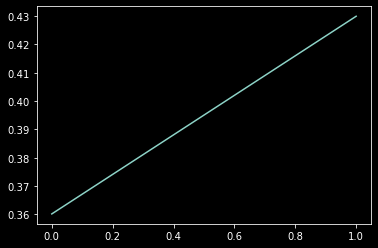

In [14]:
import matplotlib.pyplot as plt
if __name__ == "__main__":
    Xarray, Ylist = load_data('iris.data')  #加载数据
    start = time.time()  #保存开始时间
    Xarray = Normalize(Xarray)  #对特征数据进行标准化处理
    k = 3  #设定聚类数为3
    iters = 2  #设定迭代次数为2
    group_dict, scores = kmeans(Xarray, k, iters)  #进行k均值聚类
    end = time.time()  #保存结束时间
    print('Time:', end-start)
    plt.plot(range(iters), scores)  #绘制ARI得分折线图